Decision Tree Evaluation Metrics:
      Metric    Score
0   Accuracy  95.9500
1  Precision  97.3000
2     Recall  94.7400
3   F1 Score  96.0000
4        MCC  91.9255


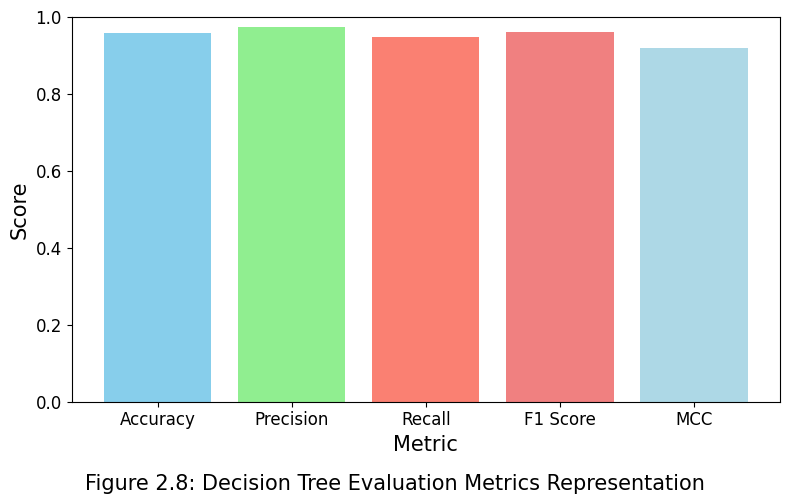

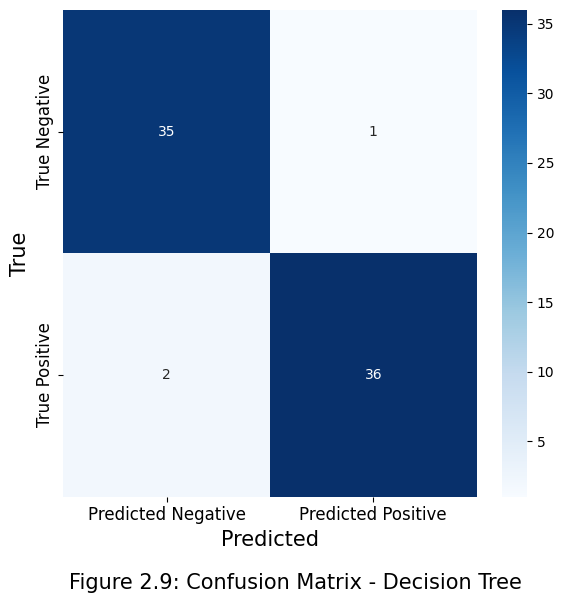

In [1]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
# Import the requests module
import requests # This line was added to import the requests module.
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


# Downloading Content From URL & Storing Into Local File
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')

X = df.drop(['name', 'status'], axis=1)  # 'name' is an identifier, drop it
y = df['status']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Apply SMOTE first
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 4. Model Training with GridSearchCV for SVM
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter Grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1_macro', verbose=0)
grid_dt.fit(X_train, y_train)

# Best model
best_dt = grid_dt.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(X_test)

# Evaluation Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='binary')
recall_dt = recall_score(y_test, y_pred_dt, average='binary')
f1_dt = f1_score(y_test, y_pred_dt, average='binary')
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display results in table
results_dt = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_dt * 100, 2), round(precision_dt * 100, 2), round(recall_dt * 100, 2), round(f1_dt * 100, 2), round(mcc_dt*100, 4)]
})

print("Decision Tree Evaluation Metrics:")
print(results_dt)

# Bar chart
metrics_dt = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_dt = results_dt['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics_dt, scores_dt, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
# plt.title('Decision Tree Evaluation Metrics Representation')
plt.xlabel('Metric', fontsize=15, color='black')
plt.ylabel('Score', fontsize=15,color='black')
plt.ylim(0, 1)
plt.tick_params(axis='both', colors='black', labelsize=12)
# Caption below the plot
plt.figtext(0.5, 0.01, 'Figure 2.8: Decision Tree Evaluation Metrics Representation',
            wrap=True, horizontalalignment='center', fontsize=15)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('decision_tree_metrics.png', dpi=300)

plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted', fontsize=15, fontname='Times New Roman', color='black')
plt.ylabel('True', fontsize=15, fontname='Times New Roman', color='black')
plt.tick_params(axis='both', colors='black', labelsize=12)
# plt.title('Confusion Matrix - Decision Tree')
# Caption below the plot
plt.figtext(0.5, 0.01, 'Figure 2.9: Confusion Matrix - Decision Tree',
            wrap=True, horizontalalignment='center', fontsize=15, fontname='Times New Roman')

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('confusion_matrix_dt.png', dpi=300)

plt.show()
